In [5]:
# Task 1:loading dataset and displaying the first few rows of the dataset 

import pandas as pd
data = pd.read_csv('gallstone_dataset.csv')
print(data.head(5))

   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High Density Lipoprotein (HDL)  Triglyceride  \


In [8]:
# Check data types and non-null counts
print(data.info())

# Check for missing values in each column
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [9]:
# Task 2: Basic Data Analysis

# 1. Compute basic statistics for all numerical columns
print("Basic Statistics:\n")
print(data.describe())

# 2. Perform grouping on a categorical column
# Let's group by "Gender" (assuming 0 = Female, 1 = Male) and calculate the mean for each group
print("\nMean values grouped by Gender:\n")
grouped_by_gender = data.groupby('Gender').mean(numeric_only=True)
print(grouped_by_gender)

# 3. Identify patterns or interesting findings
# Example: Compare Gallstone Status prevalence by gender
print("\nAverage Gallstone Status by Gender (0=Female, 1=Male):\n")
print(data.groupby('Gender')['Gallstone Status'].mean())

Basic Statistics:

       Gallstone Status         Age      Gender  Comorbidity  \
count        319.000000  319.000000  319.000000   319.000000   
mean           0.495298   48.068966    0.492163     0.335423   
std            0.500763   12.114558    0.500724     0.517340   
min            0.000000   20.000000    0.000000     0.000000   
25%            0.000000   38.500000    0.000000     0.000000   
50%            0.000000   49.000000    0.000000     0.000000   
75%            1.000000   56.000000    1.000000     1.000000   
max            1.000000   96.000000    1.000000     3.000000   

       Coronary Artery Disease (CAD)  Hypothyroidism  Hyperlipidemia  \
count                     319.000000      319.000000      319.000000   
mean                        0.037618        0.028213        0.025078   
std                         0.190568        0.165841        0.156609   
min                         0.000000        0.000000        0.000000   
25%                         0.000000        

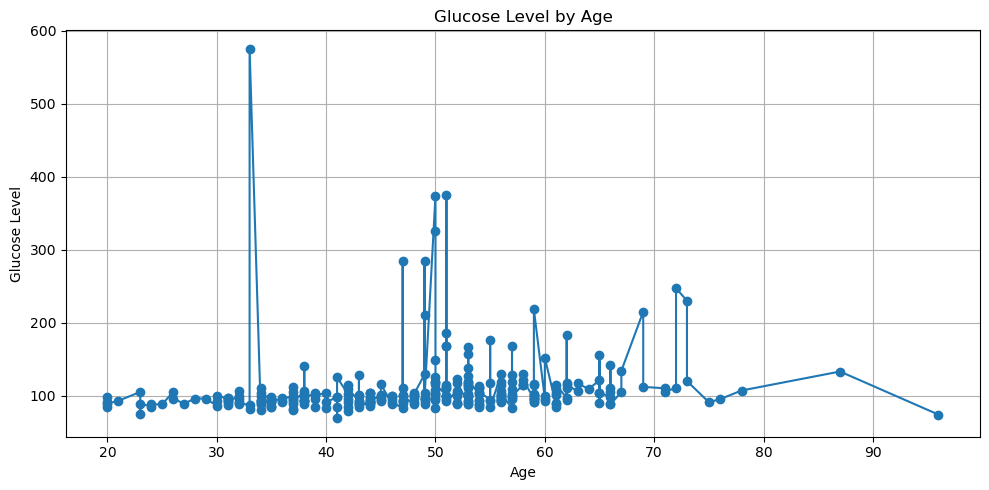

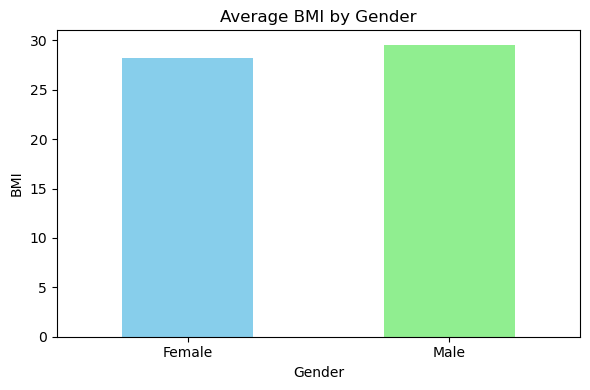

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


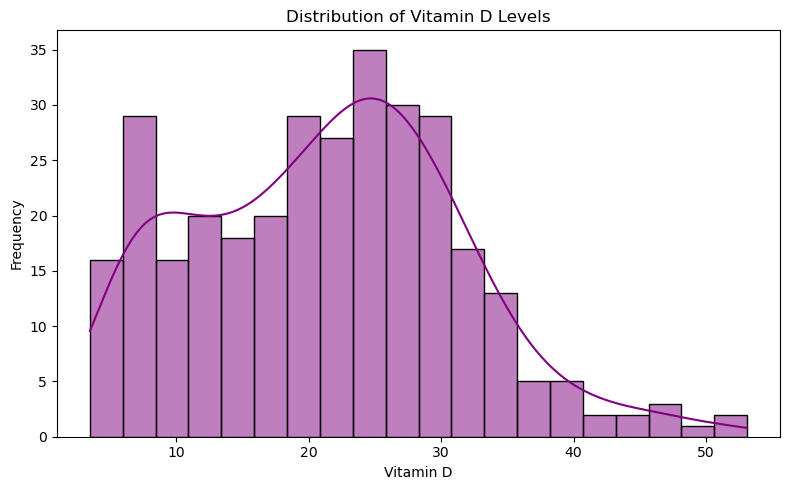

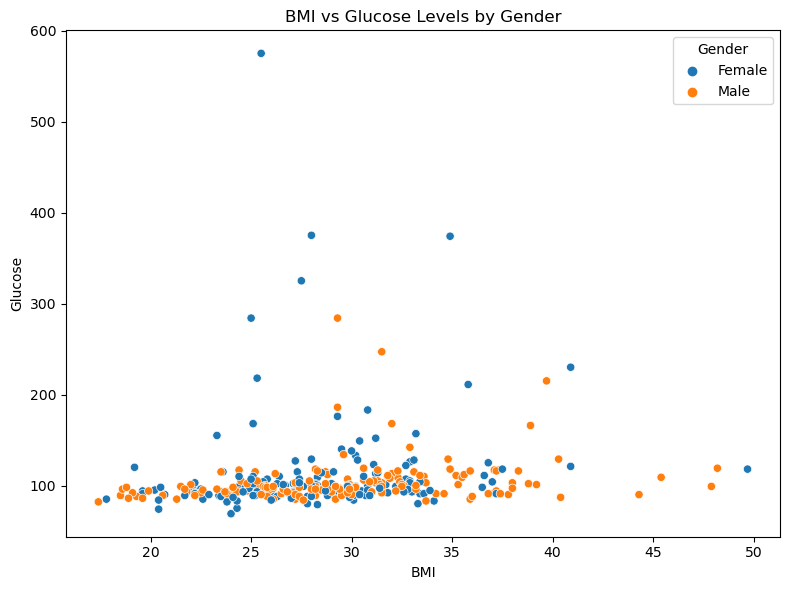

In [26]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Re-map Gender column for labels (0: Female, 1: Male)
gender_labels = {0: 'Female', 1: 'Male'}
data['Gender Label'] = data['Gender'].map(gender_labels)

# 1. Line Chart – Glucose level by Age
sorted_data = data.sort_values('Age')
plt.figure(figsize=(10, 5))
plt.plot(sorted_data['Age'], sorted_data['Glucose'], marker='o', linestyle='-')
plt.title('Glucose Level by Age')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar Chart – Average BMI by Gender
data['Body Mass Index (BMI)'] = data['Body Mass Index (BMI)'].apply(lambda x: np.nan if (x == float('inf') or x == float('-inf')) else x)
avg_bmi_by_gender = data.groupby('Gender Label')['Body Mass Index (BMI)'].mean()
plt.figure(figsize=(6, 4))
avg_bmi_by_gender.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average BMI by Gender')
plt.ylabel('BMI')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Histogram – Distribution of Vitamin D levels
plt.figure(figsize=(8, 5))
sns.histplot(data['Vitamin D'], bins=20, kde=True, color='purple')
plt.title('Distribution of Vitamin D Levels')
plt.xlabel('Vitamin D')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter Plot – BMI vs Glucose colored by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Body Mass Index (BMI)', y='Glucose', hue='Gender Label', data=data)
plt.title('BMI vs Glucose Levels by Gender')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
